In [1]:
""" 
Coursework for k-means, spectral agglomerative clustering algorithms,
as well as ensemble clustering.
""" 

from matplotlib import pyplot as plt
from sklearn import cluster,datasets
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Part 1. K-means Clustering Analysis

### <span style="color:red">=========== Assignment 1 ===========</span>

Use mu_a as the initial mean point: 
Use mu_b as the initial mean point: 
Use mu_c as the initial mean point: 


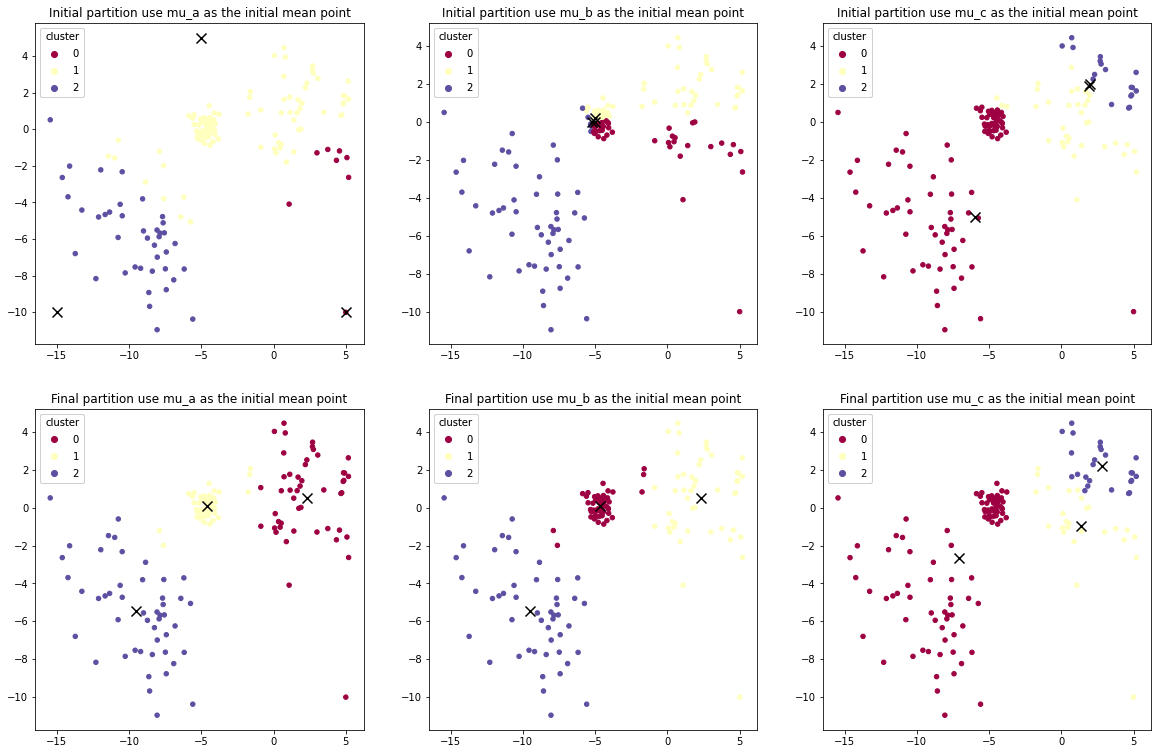

In [2]:
########################### K-means Clustering Analysis #######################################
# Assignment 1:
# ===

X = np.load('./Data/kmeans_data_1.npy')

mu_a = np.array([[5,-10],[-5,5],[-15,-10]]) # The given initial mean points of (a) 
mu_b = np.array([[-5,0],[-5,0.2],[-5.2,0]]) # The given initial mean points of (b) 
mu_c = np.array([[-6,-5],[1.9,1.9],[2.,2.]]) # The given initial mean points of (c) 

def partition(X, mu):
    """
    Helper function that performs a partition given the mean points using Euclidean distance
    Each input is numpy array:
        - X: (N,d) or (N,C,d), data points
        - mu: (C x d), the mean points
    
    Returns:
        partition: (N), the label of partition that each datapoint belongs to
    """
    N = X.shape[0] # number of objects
    C = mu.shape[0] # number of clusters
    ###
    #   You code here
    ###
    #tile x (N,d) to (N,C,D)
    if len(np.shape(X)) == 2:
        x_CND = np.tile(X,[C,1,1])#(N,d) -> (C,N,d)
        x_NCD = np.transpose(x_CND, axes = [1,0,2])
    distance_NC = np.sum((x_NCD - mu)**2,axis = 2)
    argmin_distance_N = np.argmin(distance_NC,axis = 1)
    distance_N = np.sqrt(np.min(distance_NC,axis = 1))
    partition = argmin_distance_N
    ###
    #   End of Your code
    ###
    return partition

############################
# a) Implement a display function, where different clusters must be marked in different colours

def visualize_kmeans_res(mu,X,lb,title = ''):
    #####
    #   Your code here
    # ===

    # use axe.scatter to plot
    scatter = ax.scatter(X[:, 0], X[:, 1],c=lb, cmap=plt.cm.Spectral,s=20)
    # get the legends of ax.scatter
    legend1 = ax.legend(*scatter.legend_elements(),loc="upper left", title="cluster")
    # show the legends
    ax.add_artist(legend1)
    # plot the Centroid
    scatter2 = ax.scatter(mu[:, 0], mu[:, 1], marker='x', label = 'mean point',c='black', s = 100)
    # show title
    plt.title(title)
    
    ###
    #   End of your code
    ###

    
#############################
# b) Display the final partitions where the initial and final mean points
#
#   Your code here
# ===

fig = plt.figure(figsize=(20,13))
# Use mu_a as the initial mean point 
print("Use mu_a as the initial mean point: ")
# Create a 2*3 subplot, It is the first subplot
ax=plt.subplot(231)
# get the label of initial partition using mu_a
partition_a_init = partition(X, mu_a) 
# visualize the initial partition.
visualize_kmeans_res(mu_a,X,partition_a_init,'Initial partition use mu_a as the initial mean point')

# Use final mean point to visualize the partition.
# Create a 2*3 subplot, It is the fourth subplot
ax=plt.subplot(234)
# using kmeans to find the center with mu_a.
kmeans_a = KMeans(n_clusters=mu_a.shape[0], init=mu_a, n_init=1).fit(X)
# get the final center.
center_a = kmeans_a.cluster_centers_
# get the label of final partition using mu_a
partition_a_final = partition(X, center_a) 
# visualize the partition.
visualize_kmeans_res(center_a, X, partition_a_final,title="Final partition use mu_a as the initial mean point")

# Use mu_b as the initial mean point 
print("Use mu_b as the initial mean point: ")
# Create a 2*3 subplot, It is the second subplot
ax=plt.subplot(232)
# get the label of initial partition using mu_b
partition_b_init = partition(X, mu_b) 
# visualize the initial partition.
visualize_kmeans_res(mu_b,X,partition_b_init,'Initial partition use mu_b as the initial mean point')

# Use final mean point to visualize the partition.
# Create a 2*3 subplot, It is the fifth subplot
ax=plt.subplot(235)
# using kmeans to find the center with mu_b.
kmeans_b = KMeans(n_clusters=mu_b.shape[0], init=mu_b, n_init=1).fit(X)
# get the final center.
center_b = kmeans_b.cluster_centers_
# get the label of final partition using mu_b
partition_b_final = partition(X, center_b) 
# visualize the partition.
visualize_kmeans_res(center_b, X, partition_b_final,title="Final partition use mu_b as the initial mean point")



# Use mu_c as the initial mean point 
print("Use mu_c as the initial mean point: ")
# Create a 2*3 subplot, It is the third subplot
ax=plt.subplot(233)
# get the label of initial partition using mu_c
partition_c_init = partition(X, mu_c) 
# visualize the initial partition.
visualize_kmeans_res(mu_c,X,partition_c_init,'Initial partition use mu_c as the initial mean point')

# Use final mean point to visualize the partition.
# Create a 2*3 subplot, It is the sixth subplot
ax=plt.subplot(236)
# using kmeans to find the center with mu_c.
kmeans_c = KMeans(n_clusters=mu_c.shape[0], init=mu_c, n_init=1).fit(X)
# get the final center.
center_c = kmeans_c.cluster_centers_
# get the label of final partition using mu_c
partition_c_final = partition(X, center_c) 
# visualize the partition.
visualize_kmeans_res(center_c, X, partition_c_final,title="Final partition use mu_c as the initial mean point")

# display the plot
plt.show()

### <span style="color:red">=========== End of Assignment 1 ===========</span>

### <span style="color:red">=========== Assignment 2 ===========</span>

In [3]:
##########################
# Assignment 2 
#
# K-means algorithm cannot be used until the hyperparameter K (the
# number of clusters) is set up so the
# clustering result is better. We use f_ratio from the lecture
# to do so.
# ===


################
# (a) Implement the scatter-based F-ratio index in Python 
#   where Euclidean distance is used

def f_ratio_euclidean(X,lb):
    """
    # Compute the f-ratio = k * ssw / ssb
    
    Input:
        - X: (n,d), n datapoints each with d dimension
        - lb: (n,) label of each datapoint, each element is an
              integer, >=0, <n.
    
    Return:
        - f_ratio = k * ssw / ssb: scalar
    """ 
    k = len(np.unique(lb))
    _,d = np.shape(X)
    n = np.zeros(k)
    c = np.zeros([k,d])
    ###
    # Your code here
    ###

    # 1. Calculate ssw
    # 1.1 Get the centroids of the cluster
    clusters = []
    for i in np.unique(lb):
        # Separate each cluster
        cluster = X[lb == i]
        # Get the clusters, cluster[i] stand for the cluster with label == i
        clusters.append(cluster)
        # n[i] is the number of points in cluster[i]
        n[i] = len(cluster)
        # c[i] is the mean point of cluster[i]
        c[i] = np.mean(cluster, axis = 0)
        
    # 1.2 Get ssw.
    ssw = 0
    # Iterate through each cluster(lb = i)
    for i in range(len(clusters)):
        # Traverse every point in the cluster
        for member in clusters[i]:
            # get the square of distance between data point and the center.
            for j in range(len(c[i])):
                ssw += (c[i][j] - member[j]) ** 2
        
#     print('ssw: ', ssw)
      
    
    # 2. Calculate ssb
    # 2.1 Get the global mean of entire dataset, which is m in slide
    m = np.mean(c, axis=0)
#     print("m is:")
#     print(m)
    
    # 2.2 get ssb
    ssb = 0
    # Iterate through each cluster(lb = i)
    for i in range(len(clusters)):
        # Traverse the center of the cluster
        for j in range(len(c[i])):
            # get the distance between center and the global center.
            ssb += (c[i][j] - m[j]) ** 2 * n[i]
        
#     print('ssb: ', ssb)
    
    # 3. Calculate the f_ratio
    f_ratio = k * ssw / ssb
    
    ###
    # End of your code
    ###
    return f_ratio


warnings.filterwarnings('ignore')
np.random.seed(0)
################
# (b) For K = 2, 3, · · · , 10, run the the K-means each with 3 different random initialisation
#  on the 'kmeans_data_2.npy' dataset and plot F-ratio index versus K
#
# Your code here:
# ===
X = np.load('./Data/kmeans_data_2.npy')

print("The min of X is ", np.min(X))
print("The max of X is ",np.max(X))

f_ratios = []
for k in range(2, 10):
    for j in range(3):
        # Generate a random array with shape (k, 2)
        # By looking at the maximum and minimum values of the original data, we can see that the value range can be set between -9 and 10
        init_center =np.random.uniform(low=-9.0, high=10.0, size=(k,2))
        # use tmp to keep all the f_ratios in same k.
        tmp = []
        kmeans = KMeans(n_clusters=k, init=init_center, n_init=1).fit(X)
        center = kmeans.cluster_centers_
        lb = partition(X, center)
        tmp.append(f_ratio_euclidean(X,lb))
        
        # Prove that we have been random three times
        if j == 2:
            # Put k value and the smallest value in tmp into f_ratios
            f_ratios.append([k, min(tmp)])
    
f_ratios = np.array(f_ratios)
print("f ratios is: ", f_ratios)



The min of X is  -8.973315474050885
The max of X is  10.046713968482138
f ratios is:  [[2.         1.66253121]
 [3.         0.90467252]
 [4.         0.76756922]
 [5.         0.32670029]
 [6.         0.33629084]
 [7.         0.37877833]
 [8.         0.37612924]
 [9.         0.39683604]]


Text(0.5, 1.0, 'F-ratio index (y-axis) versus K (x-axis)')

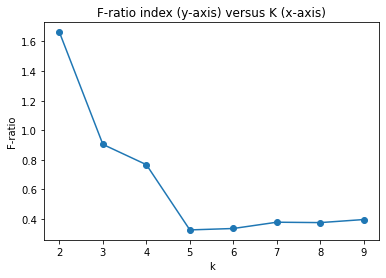

In [4]:
# plot F-ratio index (y-axis) versus K (x-axis)
plt.plot(f_ratios[:, 0], f_ratios[:, 1], marker='o')
plt.xlabel("k")
plt.ylabel("F-ratio")
plt.title("F-ratio index (y-axis) versus K (x-axis)")

In [5]:
#  report the optimal number of clusters in this data set
# Find the index of the minimum value in the second column (use [1])
# because the first column is the k value, it does not make sense to find the minimum value
min_idx = f_ratios.argmin(axis=0)[1]

print("the optimal number of clusters in this data set is:")
# Get the corresponding column index according to the index of the minimum value
# then take out k(The first element) in the list
print(int(f_ratios[min_idx][0]))       


the optimal number of clusters in this data set is:
5


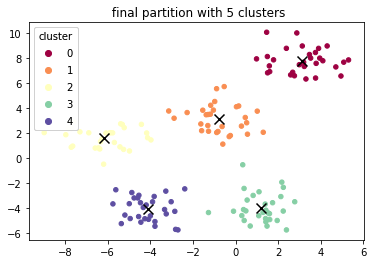

In [6]:
warnings.filterwarnings('default')
################
# (c) Display the final partition with optimal number of clusters
#
# Your code here:
# ===

init_center = np.random.rand(5, 2)
final_kmeans = KMeans(n_clusters=5, init=init_center, n_init=1).fit(X)
final_center = final_kmeans.cluster_centers_
final_partition = partition(X, final_center) 
# visualize the initial partition.
ax=plt.subplot(111)
visualize_kmeans_res(final_center,X,final_partition,' final partition with 5 clusters')
plt.show()

### <span style="color:red">=========== End of Assignment 2 ===========</span>

## Part 2. Spectral Clustering Analysis

### <span style="color:red">=========== Assignment 3 ===========</span>

Text(0.5, 1.0, 'datapoint and clustering result')

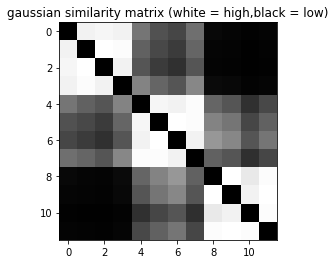

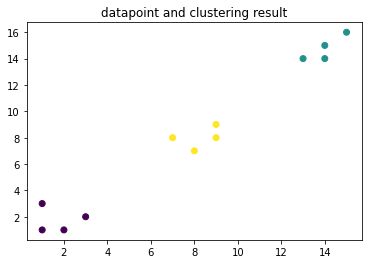

In [7]:
########################### Spectral Clustering Analysis ######################################
# Assignment 3:
#
# Here you are to implement the asymmetric normalised spectral clustering algorithm.
#
# Hint: To implement the asymmetric_SC function, you can
#       use the built-in function, np.linalg.eig, in the numpy library for eigen analysis,
#       and, pairwise_distances, in sklearn.metrics for compute parewise distance, and the
#       sklearn built-in function, cluster.KMeans.
# ===

from sklearn.metrics import pairwise_distances

def gaussian_similarity(X,delta):
    """
    # Compute the similarity matrix for spectral clustering using RBF kernel
    # Construction of similarity matrix is diverse and non-trivial, this
    # is only one of the types.
    # Also, the parameter delta has large influence on the final result

    
    Input:
        - X: (n,d), n datapoints each with d dimension
        - delta: scalar, width of RBF kernel
    
    Return:
        - W: (n,n) similarity matrix
    """
    
    ###
    # Hint: The RBF kernel definition can be found in the lecture notes.
    
    # get the number of data points
    n = len(X)
    # w stands for the weight matrix
    w = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            if i != j:
                #calculate the square of distance of 2 points, and sum up them.
                distance_square = np.sum((X[i] - X[j]) ** 2)
                #The RBF kernel
                w[i][j]= np.exp(-1/2 * (distance_square / delta ** 2))

    return w


def asymmetric_SC(W,k = 1):
    """
    # Compute the spectral clustering according to [Shi and Malik 2000]
    # See http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.165.9323
    Input:
        - W: (n,n), similarity matrix or weighted adjacency matrix
        - k: scalar, number of clusters
            
    
    Return:
        - lb: (n,) label for each datapoint
        - e: 1-d array of eigen value
        - v: 2-d matrix, each column is an eigen vector
    """
    ###
    # Hint: Be wary that "Asymmetric Normalized" spectral clustering does eigen analysis on D^-1 * L .
    #       See lecture slides if you don't know how to start 
    #
    # Hint: Computing the invert matrix is computationally expensive for high-dimensional
    #       matrices. But here, we only need to the invert a diagnal matrix, which is simple to compute.
    # PS: There is no unreal eigen value here, but sometimes numerical precision problems happen
    #
    # First do eigen analysis. 
    #
    # Your code here :
    ###
    
    # 1. Compute asymmetric normalised Laplacian matrix
    # 1.1 Get the degree matrix
    n = len(W)
    degree = np.zeros((n,n))
    for i in range(n):
        degree[i][i] = np.sum(W,axis=1)[i]   
    # 1.2 Get the Laplacian matrix
    # L is the Laplacian matrix
    L = np.identity(n) - np.dot(np.linalg.inv(degree),W)
    
    # 2. Compute first K eigenvectors corresponding to K smallest eigenvalues
    # 2.1 Find out all eigenvalues and eigenvectors
    eig_val, eig_vec = np.linalg.eig(L)
    # 2.2 Sort all eigenvalues
    # Get the index of the feature vectors sorted from smallest to largest.
    sorted_idx = np.argsort(eig_val)
    sorted_eig_val = eig_val[sorted_idx]
    # data are organised in the column vector notation, so we need to sort the columns.
    sorted_eig_vec = eig_vec[:, sorted_idx]
    # 2.3 Select the top k sorted eigenvalues( lower-dimensional representation of data) and the eigenvectors associated with it
    e = sorted_eig_val[:k]
    v = np.array(sorted_eig_vec[:,:k])
    
    # 3. Apply K-means algorithm
    kmeans = KMeans(n_clusters=k, random_state=0).fit(v)
    center = kmeans.cluster_centers_
    # get the partition
    lb = partition(v,center)
       
    ###
    # End of your code
    ###
    return lb,e,v


####### 
# Now test your implementation with toy data and provided hyper parameters.
# You should see a graph showing a clear block matrix, and a reasonable clustering result
# PS: this is just for testing. No suggestion of using what parameter
# ==
X = np.array([
    [1, 3], [2, 1], [1, 1],
    [3, 2], [7, 8], [9, 8],
    [9, 9], [8, 7], [13, 14],
    [14, 14], [15, 16], [14, 15]
])


W = gaussian_similarity(X,delta = pairwise_distances(X).std())
plt.figure()
plt.title('gaussian similarity matrix (white = high,black = low)')
plt.imshow(W,cmap = 'gray')

lb,_,_ = asymmetric_SC(W,3)
plt.figure()
plt.scatter(X[:,0],X[:,1],c = lb)
plt.title('datapoint and clustering result')


### <span style="color:red">=========== End of Assignment 3 ===========</span>

### <span style="color:red">=========== Assignment 4 ===========</span>

### The answer to the question a & b

In [23]:
########################### 
# Assignment 4:
#
# Here you are to apply your implemented gaussian_similarity function to a dataset,
# saved in './Data/SC_data_1.npy'. You need to do:
#   a) find out an appropriate hyperparameter value in the Gaussian kernel
#   b) calculate and report the first non-zero eigen vector of laplacian L
#   c) decide how many clusters are in this data set and display results (you will work on this in the next cell)
#
# PS: in b), please do eigen analysis of 'L', not D^-1 L.
# ===
X = np.load('./Data/SC_data_1.npy')
###
# a) & b), You code here:
###
print("The way I found an appropriate hyperparameter value in the Gaussian kernel is:")
print("The grid search algorithm is used to traverse different detla values and calculate the largest eigengap under different k.")
print("Select the delta corresponding to the largest eigengap.")

# 1. Find the appropriate delta 
# Use a list save the value
max_eigengap = []

# Traverse the delta from 0.1 to 9.0
for delta in np.arange(0.1, 9.1, 0.1):
    delta = np.round(delta,1) 

    W = gaussian_similarity(X,delta) 
    # Get the length of similarity matrix
    n = len(W)
    # Get the degree matrix
    degree = np.zeros((n,n))
    for i in range(n):
        degree[i][i]=np.sum(W,axis=1)[i]
    degree = np.array(degree)

    # Get the Laplacian matrix
    # L is the Laplacian matrix
    L = degree - W

    # Find out all eigenvalues and eigenvectors
    eig_val, eig_vec = np.linalg.eig(L)
    # Get the index of the feature vectors sorted from smallest to largest.
    sorted_idx = np.argsort(eig_val)
    sorted_eig_val = eig_val[sorted_idx]
    # data are organised in the column vector notation, so we need to sort the columns.
    sorted_eig_vec = eig_vec[:, sorted_idx]

    # Calculate the max value of gap in eigen value
    eigengap = []
    # Calculate the eigen value except the first one, otherwise the first eigengap will always be the largest.
    for i in range(2, len(sorted_eig_val)):
        eigengap.append(sorted_eig_val[i] - sorted_eig_val[i-1])
    # Get the biggest eigengap
    maxgap = np.max(eigengap)
    max_eigengap.append(maxgap)
        
# Get delta
# Use index find value.
delta = np.round(np.argmax(max_eigengap) * 0.1 + 0.1, 1)
print("\nThe appropriate hyperparameter value delta :", delta)        

The way I found an appropriate hyperparameter value in the Gaussian kernel is:
The grid search algorithm is used to traverse different detla values and calculate the largest eigengap under different k.
Select the delta corresponding to the largest eigengap.

The appropriate hyperparameter value delta : 3.9


In [24]:
# 2. Compute Laplacian matrix
# delta = 3.9
W = gaussian_similarity(X,3.9)
n = len(W)
# 2.1 Get the degree matrix
degree = np.zeros((n,n))
for i in range(n):
    degree[i][i] = np.sum(W,axis=1)[i]   
# 2.2 Get the Laplacian matrix
# L is the Laplacian matrix
L = degree - W
    
# 3. Compute first K eigenvectors corresponding to K smallest eigenvalues
# 3.1 Find out all eigenvalues and eigenvectors
eig_val, eig_vec = np.linalg.eig(L)
# 3.2 Sort all eigenvalues
# Get the index of the feature vectors sorted from smallest to largest.
sorted_idx = np.argsort(eig_val)
sorted_eig_val = eig_val[sorted_idx]
# data are organised in the column vector notation, so we need to sort the columns.
sorted_eig_vec = eig_vec[:, sorted_idx]

###
# End of your code
#
# Fill your result below:
###
print('a) One hyperparameter value for Gaussian kernel:', 3.9)
print()
print("The first eigenvalue: ", sorted_eig_val[0])
print("It can be seen that the first eigenvalue is non-zero,\nso we should list all the elements of the eigenvector corresponding to the smallest eigenvalue.\n")

print('b) First non-zero eigen vector:\n', sorted_eig_vec[:, 1].reshape(4, 10))

a) One hyperparameter value for Gaussian kernel: 3.9

The first eigenvalue:  -1.7763568394002505e-15
It can be seen that the first eigenvalue is non-zero,
so we should list all the elements of the eigenvector corresponding to the smallest eigenvalue.

b) First non-zero eigen vector:
 [[ 0.07006974  0.04668548  0.12107474  0.11618638 -0.11664666 -0.05032658
  -0.21327086  0.09489027 -0.19348695 -0.13501158]
 [ 0.12544847  0.07064727 -0.09569526  0.23937901 -0.15187851 -0.11274953
   0.062318   -0.30620944 -0.10865146  0.16594508]
 [ 0.29333631 -0.24185327  0.13547531  0.16590545  0.13829998 -0.25942479
   0.15682839 -0.14049141  0.06638138 -0.00829069]
 [ 0.22505985 -0.17784063 -0.04811932 -0.1396979  -0.14098821  0.15970458
   0.13935739 -0.07017685 -0.13091776  0.24873454]]


the optimal number of k in this data set is:
1
c)  1  clusters, because the eigengap between 2 and 3 is maximized. 


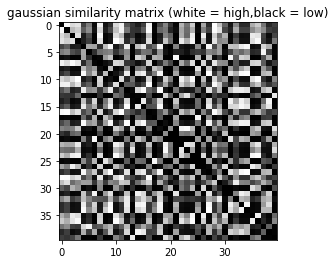

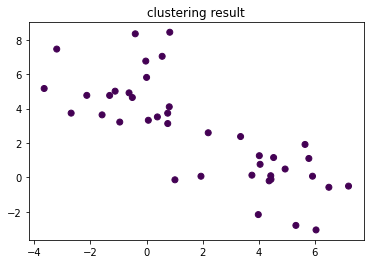

In [26]:
# c) Decide the number of clusters in this data set and display results 
# Your code here:
###

# A method to get best k
# use the list to store eigengap
eigengap = []
for i in range(1, len(sorted_eig_val)):
    gap = sorted_eig_val[i] - sorted_eig_val[i-1]
    eigengap.append([i,gap])

eigengap = np.array(eigengap)
# Find the index of the max value in the second column (use [1])
# because the first column is the k value, it does not make sense to find the minimum value
min_idx = eigengap.argmax(axis=0)[1]

print("the optimal number of k in this data set is:")
# Get the corresponding column index according to the index of the minimum value
# then take out k(The first element) in the list
best_k = int(eigengap[min_idx][0])
print(best_k)       


# get the weight matrix
W = gaussian_similarity(X,3)
# plot the weight matrix
plt.figure()
plt.title('gaussian similarity matrix (white = high,black = low)')
plt.imshow(W,cmap = 'gray')

# plot the clustering result
lb,e,v = asymmetric_SC(W,best_k)
classes = len(np.unique(lb))
plt.figure()
plt.scatter(X[:,0],X[:,1],c = lb)
plt.title('clustering result')

###
#  End of your code
#
#  Fill your answer below:
###
print('c) ', best_k, ' clusters, because the eigengap between 2 and 3 is maximized. ' )

### <span style="color:red">=========== End of Assignment 4 ===========</span>

### <span style="color:red">=========== Assignment 5 ===========</span>

In [ ]:
########################### 
# Assignment 5:
#
# Here you are to apply your implemented gaussian_similarity function to 
# more datasets and display results. You need to find proper hyper parameters
# ===
X1 = np.load('./Data/SC_data_1.npy')
X2 = np.load('./Data/SC_data_2.npy')
X3 = np.load('./Data/SC_data_3.npy')
###
#  Your code here
###

# get the similarity matrix
W1 = gaussian_similarity(X1,100)

# plot the clustering result
# The number of cluster I find in A4 is 2
lb1,e1,v1 = asymmetric_SC(W1,2)
classes1 = len(np.unique(lb1))
plt.figure(figsize=(5,5))
plt.scatter(X1[:,0],X1[:,1],c = lb1)
plt.title('clustering result')

# get the similarity matrix
W2 = gaussian_similarity(X2,0.05)

# plot the clustering result
lb2,e2,v2 = asymmetric_SC(W2,2)
classes2 = len(np.unique(lb2))
plt.figure(figsize=(5,5))
plt.scatter(X2[:,0],X2[:,1],c = lb2)
plt.title('clustering result')

# get the similarity matrix
W3 = gaussian_similarity(X3,0.05)

# plot the clustering result
lb3,e3,v3 = asymmetric_SC(W3,2)
classes3 = len(np.unique(lb3))
plt.figure(figsize=(5,5))
plt.scatter(X3[:,0],X3[:,1],c = lb3)
plt.title('clustering result')


### <span style="color:red">=========== End of Assignment 5 ===========</span>

## Part 3. Hierarchical Clustering Analysis

### <span style="color:red">=========== Assignment 6 ===========</span>

In [ ]:
########################### 
# Assignment 6:
#
# Here, you are to use built-in functions in scipy.cluster.hierarchy: 'linkage, dendrogram' to 
# do hierachical clustering.
#
# You need to: a) plot three dendrogram trees achieved by the use of
# three cluster-distance measures in the agglomerative algorithm; (b) report the number of clusters
# found by using the longest K-cluster lifetime criterion achieved from (a), respectively; 
# (c) display 3 clustering results achieved by (a) and (b)
# ===
warnings.filterwarnings('ignore')
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
import scipy.cluster.hierarchy as sch
X = np.load('./Data/HC_data.npy')


# a):
# A (?,4) shape matrix Z should returned. At the i-th iteration, 
#   clusters with indices Z[i, 0] and Z[i, 1] are combined 
#   to form cluster . A cluster with an index less than n
#   corresponds to one of the n original observations. 
#   The distance between clusters Z[i, 0] and Z[i, 1] is 
#   given by Z[i, 2]. The fourth value Z[i, 3] represents 
#   the number of original observations in the newly formed cluster.
#
#   Then, plot the clustering result as a Dendrogram
#       The dendrogram illustrates how each cluster is composed by drawing a U-shaped
#       (or n-shaped) link between a non-singleton cluster and its children. The top of the 
#       U-link indicates a cluster merge. The two legs of the U-link indicate 
#       which clusters were merged. The horizental coordinates of a merge 
#       represents the distance between the two clusters. 
#
#  Your code here
###

# 1  Calculate the distance matrix
n = len(X)

# 2. Calculate three cluster distances between C1 and C2.
Z_single_linkage = linkage(X, method='single', metric='euclidean')
Z_complete_linkage = linkage(X, method='complete', metric='euclidean')
Z_group_average = linkage(X, method='average', metric='euclidean')

# 3. plot three dendrogram trees achieved by the use of three cluster-distance measures in the agglomerative algorithm
fig, axes = plt.subplots(3, 1, figsize=(20, 20))
dn_single_linkage = dendrogram(Z_single_linkage, ax=axes[0], leaf_font_size=12, leaf_rotation=0)
dn_comlete_linkage = dendrogram(Z_complete_linkage, ax=axes[1], leaf_font_size=12, leaf_rotation=0)
dn_group_average = dendrogram(Z_group_average, ax=axes[2], leaf_font_size=12, leaf_rotation=0)
# set the title of each subplot.
axes[0].set_title("single-linkage", fontsize=20)
axes[1].set_title("complete-linkage", fontsize=20)
axes[2].set_title("group-average", fontsize=20)



In [ ]:
# (b) Now, report the number of clusters
# found by using the longest K-cluster lifetime criterion achieved from (a)
#
# Fill your answer here:
# get lifetime
def get_best_cluster(Z):
    Z = np.array(Z)
    # The distance between clusters Z[i, 0] and Z[i, 1] is given by Z[i, 2]
    # So we can get all the lifetime by traversing Z[i,2]
    lifetime = np.array([np.abs(Z[d + 1 ,2] - Z[d ,2]) for d in range(Z.shape[0]-1)])
    # get the index of longest lifetime
    # Because we calculate lifetime from bottom to top （You can see it from dendrogram）
    # to find the besr cluster, we need to use len(Z) - the index of longest lifetime
    best_cluster = len(Z)-np.argmax(lifetime)
    return best_cluster

# Get the number of cluster
cluster_single_linkage = get_best_cluster(Z_single_linkage)
cluster_complete_linkage = get_best_cluster(Z_complete_linkage)
cluster_group_average = get_best_cluster(Z_group_average)

print('b)                              ')
print('The number of cluster using single-linkage: ', cluster_single_linkage)
print('The number of cluster using complete-linkage: ', cluster_complete_linkage)
print('The number of cluster using group-average: ', cluster_group_average)

In [ ]:
# (c) Display clustering results
# Your code here:

# Get the cluster
# In b, we get the number of cluster, we can use fcluster to define the cluster
lb_single_linkage = fcluster(Z_single_linkage, cluster_single_linkage,'maxclust')
lb_complete_linkage = fcluster(Z_complete_linkage, cluster_complete_linkage, 'maxclust')
lb_group_average = fcluster(Z_group_average, cluster_group_average, 'maxclust')

# create a function to get the cluster
def get_cluster(X, lb, title=''):
    # use axe.scatter to plot
    scatter = ax.scatter(X[:, 0], X[:, 1],c=lb)
    # get the legends of ax.scatter
    legend1 = ax.legend(*scatter.legend_elements(),loc="upper left", title="cluster")
    # show the legends
    ax.add_artist(legend1)
    # show title
    plt.title(title)

# Display clustering results 
fig = plt.figure(figsize=(20,6))
ax=plt.subplot(131)
get_cluster(X, lb_single_linkage, 'single-linkage')

ax=plt.subplot(132)
get_cluster(X, lb_complete_linkage, 'complete-linkage')

ax=plt.subplot(133)
get_cluster(X, lb_group_average, 'group-average')


### <span style="color:red">=========== End of Assignment 6 ===========</span>

## Part 4. Ensemble Clustering Analysis

### <span style="color:red">=========== Assignment 7 ===========</span>

In [ ]:
########################### 
# Assignment 7:
#
# Here, you are to implement the evidence-accumulated clustering algorithm based on K-means 
# and the agglomerative algorithms in Python.
#
# Hint: To implement the ensemble_clustering function, you can use the
# build-in functions, sklearn.cluster.KMeans , in the scikit-learn library for K-means cluster-
# ing, the scipy.cluster.hierarchy.linkage and scipy.spatial.distance.squareform in the
# scipy library for hierarchical clustering
# ===


# ============
# Compute co-association matrix
# ============
# Let's firstly compute the co-association matrix for ONLY SINGLE cluster result

def compute_co_matrix_for_single_cluster(y):
    """
    # Compute the co-association matrix for single clustering result
    # It will also be used later to compute multiple clustering result
    
    Input:
        - y: (n) Label of each Datapoint
    
    Return:
        - co_matrix: (n,n). the (i,j) element is the number of same cluster components
                      that datapoint X[i] and datapoint X[j] belong to. Surely,
                      in the case of single cluster result, this number will be
                      either 0 or 1. Whether they belong to the same cluster component
                      can be judged by 'y[i] == y[j]'
    """
    
    # Initialize the co-association matrix
    n = y.shape[0]
    co_matrix = np.zeros(shape=(n,n))

    ###    
    # Your code here
    #
    # To do: finish the computation of co_matrix for single cluster
    ###
    
    for i in range(n):
        for j in range(n):
            # if y[i] == y[j] that means they belong to the same cluster component
            # Then we set co_matrix[i][j] = 0
            if y[i] == y[j]:
                co_matrix[i][j] = 1
            # Otherwise it should be 0
            else:
                co_matrix[i][j] = 0
    
    ###
    # End of your code
    ###                
    return co_matrix


# Test your implementation
y = np.array([0,1,0,1,0])
co_matrix_tmp = compute_co_matrix_for_single_cluster(y)
co_matrix_tmp
# It should show a square symmetric matrix, where each element is 0 or 1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Now compute the co-association matrix for MULTIPLE cluster results
def compute_co_matrix(y_list):
    """
    # Compute the co-association matrix
    
    Input:
        - y_list: List of lenth (N). Each element is a clustering label vector,
                  which is the same as the 'y' defined in function 
                  'compute_co_matrix_for_single_cluster(y)'
                  N is the number of clustering results you are to ensemble.
    
    Return:
        - co_matrix: (N,N). the (i,j) element is the number of same cluster components
                      that datapoint X[i] and datapoint X[j] belong to, divided
                      by N. 
                      
                      
    """
    N = len(y_list)
    
    # Initialize matrix
    n = y_list[0].shape[0]
    co_matrix = np.zeros([n,n],dtype = np.float32)

    ###   
    # Your code here    
    #
    # Hint: Use the 'compute_co_matrix_for_single_cluster(y)' you have finished
    #       to compute the co-association matrix for each cluster result,
    #       then add them together. Don't forget to normalize.
    #
    ###
    #  compute the co-association matrix for each cluster result, and add them together.
    for i in range(N):
        co_matrix += compute_co_matrix_for_single_cluster(y_list[i])  
        
    # Normalise
    # W should / N directly
    co_matrix = co_matrix / N
    ###
    # End of your code
    ###
    return co_matrix


# Test your implementation
y1 = np.array([0,1,0,1,0])
y2 = np.array([0,1,1,1,0])
y3 = np.array([0,1,1,1,1])
co_matrix_tmp = compute_co_matrix([y1,y2])
co_matrix_tmp

In [ ]:
# ============
# Implement the ensemble clustering given a co_matrix
# ============
import scipy
from scipy.spatial.distance import squareform

def ensemble_clustering(co_matrix, link_type = 'single'):
    """
    Ensamble the clustering results with Agglomerative Clustering
    
    Input: 
        - co_matrix: (n,n) co-assocication matrix. n is the number of datapoints. 
        - linkage: string, can be one of {'single','ward','average','complete'}
        
    Output: 
        - Z: a (?,4) matrix, specifying how datapoints are clustered. 
             At the i-th iteration, clusters with indices Z[i, 0]
             and Z[i, 1] are combined to form cluster. A cluster 
             with an index less than corresponds to one of the 
             original observations. The distance between clusters Z[i, 0] 
             and Z[i, 1] is given by Z[i, 2]. The fourth value Z[i, 3] 
             represents the number of original observations in the newly 
             formed cluster.
             
             Z should be the return value of 'scipy.cluster.hierarchy.linkage'
             function.
    """
    ###
    # Your code here
    #
    # To do: ensemble the clustering results with Agglomerative Clustering
    # Hint: see 'scipy.cluster.hierarchy.linkage' and 
    #           'scipy.spatial.distance.squareform'
    #
    # Hint2: 'squareform' function requires zero element on diagonal
    ###
    # Convert co-associate matrix to distance matrix 
    D = 1 - co_matrix
    # compress the matrix
    D = squareform(D)
    # get Z
    Z = linkage(D, method=link_type, metric='euclidean')
    
    ###
    # End of your code
    ###
    return Z

### <span style="color:red">=========== End of Assignment 7 ===========</span>

### <span style="color:red">=========== Assignment 8 ===========</span>

First set **different k values**, here we set it to **2 - 29**, and initialize a corresponding **random centroid** for different k.
Then use kmeans to get the partition.

The cluster-distance measure is **single-linkage**, becuase the internal points of each cluster are very close compared to the distance between the clusters.

In [ ]:
########################### 
# Assignment 8:
#
# Here, you are to Apply your implemented ensemble_clustering function to two datasets,
# SC_data_2.npy and SC_data_3.npy
#
# You will need to first get a list of clustering results by K-means (you also 
# need to choose the n_clusters), you can use the built in K-means function in sklearn.cluster.
#
# Then you will need to compute the co_matrix with your implemented function, and then
# get and display the clustering result with your implementation. Meanwhile, you need 
# to choose a proper distance measurement (the 'linkage' parameter) to make your algorithm
# work.
#
# ===
np.random.seed(1) # Ensure the results are same on submission
X = np.load('./Data/SC_data_2.npy')
###
# Now apply your ensemble clustering to the first dataset './Data/SC_data_2.npy', display results
#
# Your code here 
###

# use a list to save all the partition we generate.
lbs = []

# Generate all the partition, k is from 2 to 29.
for k in range(2, 30):
    # Generate a random array with shape (k, 2)
    # By looking at the maximum and minimum values of the original data, we can see that the value range can be set between -1. and 2.
    # We first generate a random list from -100 to 200, then divide by 100 to get a decimal number from -1 to 2
    init_center = np.random.randint(-100, 200, size=(k,2))
    init_center = init_center / 100
    # apply it into kmeans and call fit.
    kmeans_A8 = KMeans(n_clusters=k, init=init_center, n_init=1).fit(X)
    # get the centroid
    center_A8 = kmeans_A8.cluster_centers_
    # append the partition to the lbs
    lbs.append(partition(X,center_A8))

# Calculate the co_matrix    
co_matrix = compute_co_matrix(lbs)

# Get the result of ensemble clustering
# We use single-linkage here, becuase the internal points of each cluster are very close compared to the distance between the clusters
z= ensemble_clustering(co_matrix, 'single')

# Get the dendrogram
dn_single_linkage = dendrogram(z, leaf_font_size=5, leaf_rotation=0)

# Use the function we implemented to get the best number of cluster, which implement in A6.
best_k_A8 = get_best_cluster(z)
print("The best number of cluster is:", best_k_A8)

In [ ]:
# Get the cluster
# We already get the number of cluster, we can use fcluster to define the cluster.
lb_A8 = fcluster(z, 2, 'maxclust')

# the function is used to display cluster
def get_cluster(X, lb, title=''):
    # use axe.scatter to plot
    scatter = ax.scatter(X[:, 0], X[:, 1],c=lb)
    # get the legends of ax.scatter
    legend1 = ax.legend(*scatter.legend_elements(),loc="upper left", title="cluster")
    # show the legends
    ax.add_artist(legend1)
    # show title
    plt.title(title)

# Display cluster
fig = plt.figure(figsize=(5,5))
ax=plt.subplot(111)
get_cluster(X, lb_A8, 'ensemble_clustering')


In [ ]:
X = np.load('./Data/SC_data_3.npy')

np.random.seed(1)
# Now apply your ensemble clustering to the second dataset, './Data/SC_data_3.npy', display results
#
# Your code here 
###

# use a list to save all the partition we generate.
lbs2 = []

# Generate all the partition, k is from 2 to 29.
for k in range(2, 30):
    # Generate a random array with shape (k, 2)
    # By looking at the maximum and minimum values of the original data, we can see that the value range can be set between -1. and 1.
    # We first generate a random list from -100 to 100, then divide by 100 to get a decimal number from -1 to 1
    init_center = np.random.randint(-100, 100, size=(k,2))
    init_center = init_center / 100
     # apply it into kmeans and call fit.
    kmeans_A8_2 = KMeans(n_clusters=k, init=init_center, n_init=1).fit(X)
    # get the centroid
    center_A8_2 = kmeans_A8_2.cluster_centers_
    # append the partition to the lbs2
    lbs2.append(partition(X,center_A8_2))

# Calculate the co_matrix      
co_matrix_2 = compute_co_matrix(lbs2)

# Get the result of ensemble clustering
# We use single-linkage here, becuase the internal points of each cluster are very close compared to the distance between the clusters
z2= ensemble_clustering(co_matrix_2, 'single')

# Get the dendrogram
dn_single_linkage_2 = dendrogram(z2, leaf_font_size=5, leaf_rotation=0)

# Use the function we implemented to get the best number of cluster, which implement in A6.
best_k_A8_2 = get_best_cluster(z2)
print("The best number of cluster is:", best_k_A8_2)

In [ ]:
# Get the cluster
# We already get the number of cluster, we can use fcluster to define the cluster.
lb2 = fcluster(z2, 2, 'maxclust')

# Display cluster, which is implement Above.
fig = plt.figure(figsize=(5,5))
ax=plt.subplot(111)
get_cluster(X, lb2, 'ensemble_clustering')

### <span style="color:red">=========== End of Assignment 8 ===========</span>